In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel (r'MMM_Data_Task(3123).xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    156 non-null    datetime64[ns]
 1   Display_Impressions     156 non-null    int64         
 2   Video_Impressions       156 non-null    float64       
 3   Facebook_Impressions    156 non-null    float64       
 4   Twitter_Impressions     156 non-null    float64       
 5   Sales                   156 non-null    float64       
 6   Competitor1_Investment  156 non-null    float64       
 7   Competitor2_Investment  156 non-null    float64       
 8   Offline_Investment      156 non-null    float64       
 9   Average_Temp            156 non-null    float64       
 10  USD_RATE                156 non-null    float64       
 11  EURO_RATE               156 non-null    float64       
 12  Inflation               156 non-null    float64   

In [ ]:
df.describe()

,Display_Impressions,Video_Impressions,Facebook_Impressions,Twitter_Impressions,Sales,Competitor1_Investment,Competitor2_Investment,Offline_Investment,Average_Temp,USD_RATE,EURO_RATE,Inflation
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,156.000000,156.000000,156.000000,156.000000
mean,1.658789e+07,4.544218e+05,8.254500e+06,8.446291e+05,6.349826e+07,6.782968e+05,3.878629e+05,3.723507e+05,16.112491,4.679753,5.396050,14.339038
std,1.549203e+07,4.678191e+05,5.349372e+06,6.625326e+05,1.709192e+07,3.900355e+05,4.779394e+05,2.584510e+05,7.593223,1.049508,1.084019,4.535590
min,2.952000e+03,0.000000e+00,5.075070e+05,0.000000e+00,3.275620e+07,1.760671e+05,0.000000e+00,3.276000e+03,0.666667,0.000000,3.917155,8.550000
25%,6.489286e+06,1.912738e+05,4.508619e+06,3.261680e+05,5.317982e+07,4.004566e+05,3.363750e+04,2.066941e+05,9.851190,3.730310,4.277772,10.680000
50%,1.134087e+07,3.081475e+05,6.800326e+06,6.496370e+05,5.950108e+07,5.874983e+05,1.985649e+05,3.191082e+05,16.511905,4.670000,5.511750,12.150000
75%,2.054586e+07,5.649935e+05,1.085692e+07,1.187771e+06,7.040648e+07,8.339580e+05,6.537981e+05,4.567658e+05,23.035450,5.688625,6.371100,18.102500
max,8.638487e+07,4.064964e+06,3.220827e+07,2.778721e+06,1.652582e+08,2.116292e+06,3.110321e+06,1.849794e+06,29.333333,6.619200,7.402900,25.240000


In [ ]:
df.USD_RATE.describe()

count    156.000000
mean       4.679753
std        1.049508
min        0.000000
25%        3.730310
50%        4.670000
75%        5.688625
max        6.619200
Name: USD_RATE, dtype: float64

In [ ]:
df['USD_RATE'].replace(to_replace=0, method='ffill', inplace=True)
#changing 0 USD RATE with before element's value.

#df.replace(to_replace=0, method='ffill', inplace=True) #to changing every 0s in every columns with the before element. 

In [ ]:
df ["Competitor_Total_USD"]         = (df["Competitor1_Investment"] + df["Competitor2_Investment"]) / df["USD_RATE"]
df ["Competitor1_USD"]              = df["Competitor1_Investment"] / df["USD_RATE"]
df ["Competitor2_USD"]              = df["Competitor2_Investment"] / df["USD_RATE"]
df ["Ofline_Investment_USD"]        = df["Offline_Investment"] / df["USD_RATE"]
df ["Competitor_Total"]             = df["Competitor1_Investment"] + df["Competitor2_Investment"]
df ["Total_Impressions"]            = df["Display_Impressions"] + df["Video_Impressions"] + df["Facebook_Impressions"] + df["Twitter_Impressions"]
#df ["Ofline_Investment_EURO"]      = df["Offline_Investment"] / df["EURO_RATE"]
#df ["Offline_Investment_USDratio"] = df["Offline_Investment"] / df["Competitor_Total_USD"]
#df ["Competitor1_EURO"]            = df["Competitor1_Investment"] / df["EURO_RATE"]
#df ["Competitor2_EURO"]            = df["Competitor1_Investment"] / df["EURO_RATE"]
#df ["real_worth_sales"]            = df["Sales"] /  (1-(df["Inflation"]*0.01))
#some new columns didn't satisfy me. So commented out.
df.head()

,Date,Display_Impressions,Video_Impressions,Facebook_Impressions,Twitter_Impressions,Sales,Competitor1_Investment,Competitor2_Investment,Offline_Investment,Average_Temp,USD_RATE,EURO_RATE,Inflation,Competitor_Total_USD,Competitor1_USD,Competitor2_USD,Ofline_Investment_USD,Competitor_Total,Total_Impressions
0,2017-01-01,5726263,113874.0,507507.0,382978.0,4.221142e+07,2.116292e+06,1800.0,143988.320000,2.500000,3.76088,3.972632,9.22,563190.650617,562712.039228,478.611389,38285.805450,2.118092e+06,6730622.0
1,2017-01-09,9964231,151779.0,4997123.0,1043373.0,4.222362e+07,9.629011e+05,0.0,348528.889092,0.666667,3.78978,3.972632,9.22,254078.363388,254078.363388,0.000000,91965.467413,9.629011e+05,16156506.0
2,2017-01-16,8282654,616363.0,7733446.0,1344285.0,4.894903e+07,1.016881e+06,0.0,631070.349092,5.523810,3.80188,3.972632,9.22,267468.039496,267468.039496,0.000000,165989.023613,1.016881e+06,17976748.0
3,2017-01-23,11134648,679216.0,16085047.0,2225655.0,5.354662e+07,8.687881e+05,25987.5,659278.799092,1.690476,3.80802,3.972632,9.22,234971.352566,228146.939880,6824.412687,173129.027445,8.947756e+05,30124566.0
4,2017-01-30,11289814,393739.0,12858222.0,909542.0,4.666324e+07,5.724077e+05,53775.0,839649.253184,0.833333,3.72188,3.918035,10.13,168243.655944,153795.312634,14448.343310,225598.152865,6.261827e+05,25451317.0


In [ ]:
dummies = pd.get_dummies(df.Date.dt.month, drop_first=True)
df.drop('Date',axis=1,inplace=True)
df=df.join(dummies)

In [ ]:
"""df['season'] = (df.Date.dt.month - 1) // 3#winter:0, spring:1...
dummies = pd.get_dummies(df.season)
df=df.join(dummies)
df.drop('season',axis=1,inplace=True)
df.drop('Date',axis=1,inplace=True)
"""
#this line can be used to generate seasonal data instead of month based data.

"df['season'] = (df.Date.dt.month - 1) // 3#winter:0, spring:1...\ndummies = pd.get_dummies(df.season)\ndf=df.join(dummies)\ndf.drop('season',axis=1,inplace=True)\ndf.drop('Date',axis=1,inplace=True)\n"

In [ ]:
list(df)

['Display_Impressions',
 'Video_Impressions',
 'Facebook_Impressions',
 'Twitter_Impressions',
 'Sales',
 'Competitor1_Investment',
 'Competitor2_Investment',
 'Offline_Investment',
 'Average_Temp',
 'USD_RATE',
 'EURO_RATE',
 'Inflation',
 'Competitor_Total_USD',
 'Competitor1_USD',
 'Competitor2_USD',
 'Ofline_Investment_USD',
 'Competitor_Total',
 'Total_Impressions',
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12]

In [ ]:
df['Sales']=df['Sales']/df['USD_RATE']

In [ ]:
X=df.loc[:, df.columns !="Sales"]
y=df["Sales"]
df["Sales"].min()
#separating the dependent and independents.

6088825.138530316

In [ ]:
import statsmodels.api as sm
X['const'] = pd.Series([6088825.138530316 for x in range(len(df.index))])
#X = sm.add_constant(X)
model=sm.OLS(y,X)
result=model.fit()

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.650
Method:                 Least Squares   F-statistic:                     12.54
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           6.73e-24
Time:                        23:27:08   Log-Likelihood:                -2474.5
No. Observations:                 156   AIC:                             5001.
Df Residuals:                     130   BIC:                             5080.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Display_Impressions       -0

In [ ]:
"""import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,12))
corr_map = sns.heatmap(df.corr(),annot=True)"""

#corr matrix. commented out due to takes some time.

'import matplotlib.pyplot as plt\nimport seaborn as sns\nplt.figure(figsize=(30,12))\ncorr_map = sns.heatmap(df.corr(),annot=True)'

In [ ]:
"""import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")
sns.pairplot(df, palette="Set1")
plt.show()"""

#final.df.graphs file.
#one to one graphs visualization, commented out due to takes some time.

'import seaborn as sns\nimport matplotlib.pyplot as plt\n\nsns.set(style="ticks")\nsns.pairplot(df, palette="Set1")\nplt.show()'

In [ ]:
#OLS has a great result return, it gives a lot of info.
#Here we can see the off correlated feature with the our regression ("Sales") is Offline Invesment.
#Results as R^2 and Adj R^2, which are 70% and 65%, shows that Ordinary Least Squares is not much but somewhat good for this df.

In [ ]:
#import statsmodels.formula.api as sm
#mod = sm.ols(formula="Sales ~  Competitor_Total_USD + Ofline_Investment_USD", data=df).fit()
#print(mod.summary())

#another way to work with statsmodels.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)#, test_size=0.33)

In [ ]:
"""from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)"""
#X_test_std = stdsc.transform(X_test)//test setinin standartlaştırılması, didn't made it better.

'from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)'

In [ ]:
from sklearn.linear_model import Ridge, Lasso, LassoCV, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
ridge = Ridge().fit(X_train, y_train)
print(np.sqrt(mean_squared_error(y_test, ridge.predict(X_test))))
alphas = 10**np.linspace(10,-2,100)*0.5
ridge_cv = RidgeCV(alphas=alphas, cv = 5, scoring="neg_mean_absolute_error",normalize=True).fit(X_train, y_train)
ridge_tuned = Ridge(alpha=ridge_cv.alpha_).fit(X_train, y_train)
print(np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test))))
print(r2_score(y_test, ridge_tuned.predict(X_test)))

C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.22598e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


2149276.0499713095
2158395.833167456
0.4770915141225207


C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.1639e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [ ]:
lasso = Lasso().fit(X_train, y_train)
print(np.sqrt(mean_squared_error(y_test, lasso.predict(X_test))))
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=500000000, normalize=True).fit(X_train, y_train)
lasso_tuned = Lasso(alpha=lasso_cv.alpha_, max_iter=lasso.max_iter).fit(X_train, y_train)
print(np.sqrt(mean_squared_error(y_test, lasso_tuned.predict(X_test))))
print(r2_score(y_test, lasso_tuned.predict(X_test)))

C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199200350721620.34, tolerance: 151985402078.4692
  model = cd_fast.enet_coordinate_descent(


2231049.6783293947
2224629.6556372964
0.4445065447003804


C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198128517331668.97, tolerance: 151985402078.4692
  model = cd_fast.enet_coordinate_descent(


In [ ]:
enet = ElasticNet().fit(X_train, y_train)
print(np.sqrt(mean_squared_error(y_test, enet.predict(X_test))))
enet_cv = ElasticNetCV(cv = 10).fit(X_train, y_train)
enet_tuned = ElasticNet(alpha=enet_cv.alpha_).fit(X_train, y_train)
print(np.sqrt(mean_squared_error(y_test, enet_tuned.predict(X_test))))
print(r2_score(y_test, enet_tuned.predict(X_test)))

C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 250313926238544.25, tolerance: 151985402078.4692
  model = cd_fast.enet_coordinate_descent(
C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177864009547.75, tolerance: 134599186930.57031
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201232115969.375, tolerance: 134599186930.57031
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Converg

2266518.907904316


C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 361529576328.625, tolerance: 131320369262.47249
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362311572635.25, tolerance: 131320369262.47249
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 220884617908.125, tolerance: 143718425746.09842
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Con

C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 368192618788.125, tolerance: 131864563366.15216
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 373370909248.375, tolerance: 131864563366.15216
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 377111791343.375, tolerance: 131864563366.15216
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Co

2973692.3027168997
0.007442765251442829


C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261290859724.75, tolerance: 143950739593.10095
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282170372419.0, tolerance: 143950739593.10095
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301804420490.375, tolerance: 143950739593.10095
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Conve

In [ ]:
regr = ElasticNet(alpha=0.01)
regr.fit(X, y)
regr.score(X,y)

C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280112882927544.5, tolerance: 186739922440.9025
  model = cd_fast.enet_coordinate_descent(


0.7060369934412605

In [ ]:
ridge=Ridge(alpha=0.1)
ridge.fit(X,y)
ridge.score(X,y)

C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.20331e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.7067993265915986

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X,y)
lasso.score(X,y)

C:\Users\BahaD\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273721005490313.25, tolerance: 186739922440.9025
  model = cd_fast.enet_coordinate_descent(


0.7068281051529581

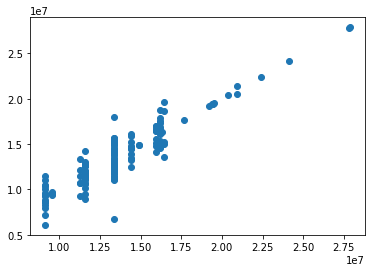

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
tree = DecisionTreeRegressor(max_depth=5, random_state=42)
tree.fit(X,y)
predicttree=tree.predict(X)
plt.scatter(predicttree,y)

##to most presice run it without running Salary/USD_RATE. In[9]

In [ ]:
tree.score(X,y)

0.8462821939729176

In [ ]:
#list(tree.feature_importances_)
#list.sort((zip(df.columns, tree.feature_importances_)))
sorted((zip(X.columns, tree.feature_importances_)), key = lambda t: t[1])

[('Offline_Investment', 0.0),
 ('Competitor_Total_USD', 0.0),
 ('Competitor1_USD', 0.0),
 ('Ofline_Investment_USD', 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 ('const', 0.0),
 ('Facebook_Impressions', 0.0009338878962198579),
 (9, 0.0010278290566729739),
 ('EURO_RATE', 0.00581230522501715),
 (12, 0.005893484268022332),
 ('Twitter_Impressions', 0.006306821970808081),
 ('Competitor2_USD', 0.006782090492690545),
 (10, 0.0068527203985507),
 ('Average_Temp', 0.011204356821530297),
 ('Competitor1_Investment', 0.01453027721707756),
 ('Display_Impressions', 0.01898111996577169),
 (11, 0.02752535499098546),
 ('Competitor2_Investment', 0.03032176177786037),
 ('USD_RATE', 0.036614146900977744),
 ('Video_Impressions', 0.0514393798185082),
 ('Competitor_Total', 0.060034480040125515),
 ('Inflation', 0.3576853308777299),
 ('Total_Impressions', 0.3580546522814518)]

In [ ]:
#tree.fit(X_train,y_train)
#predicttree=tree.predict(X_test)
#r2_score(y_test, predicttree)